In [1]:
# Impoting necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Models:
#(for classification)
from sklearn.model_selection import train_test_split


In [10]:
# READING THE DATASET
df=pd.read_csv(r"C:\Users\HP\Downloads\bank.csv", sep= ';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [3]:
df.shape

(4521, 17)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


#### Satistical Findings:

- In case of balance, as the std is greater than the mean, maybe there is presence of skewness.
- In case of duration also the std is almost there like mean, so maybe there is some skewnwss present, and the difference between minimum with first quartile is also huge. Similarly, difference between quartile 3 with max is huge, so, skewness should be there. 
- There is no missing values in the continuous data.
- campain, pdays, previous - all these columns are containing discrete values.
- Min age is 19 and max age is 87.
- It seems like day column is containing number of days of a single month
- As we need to build a realistic predictive model we need to drop duration column.
- Campaign columns is number of contacts performed during this campaign and for this client, that's why it is a discrete column.
- pdays column is containing number of days that passed by after the client was last contacted from a previous campaign, that's why it is also a discrete column.
- previous column is containing number of days that passed by after the client was last contacted from a previous campaign, so it is also a discrete column.

#### Exploratory data analysis:

In [16]:
df_con_features=df[['age','balance','day','duration','campaign',
                    'pdays','previous']]

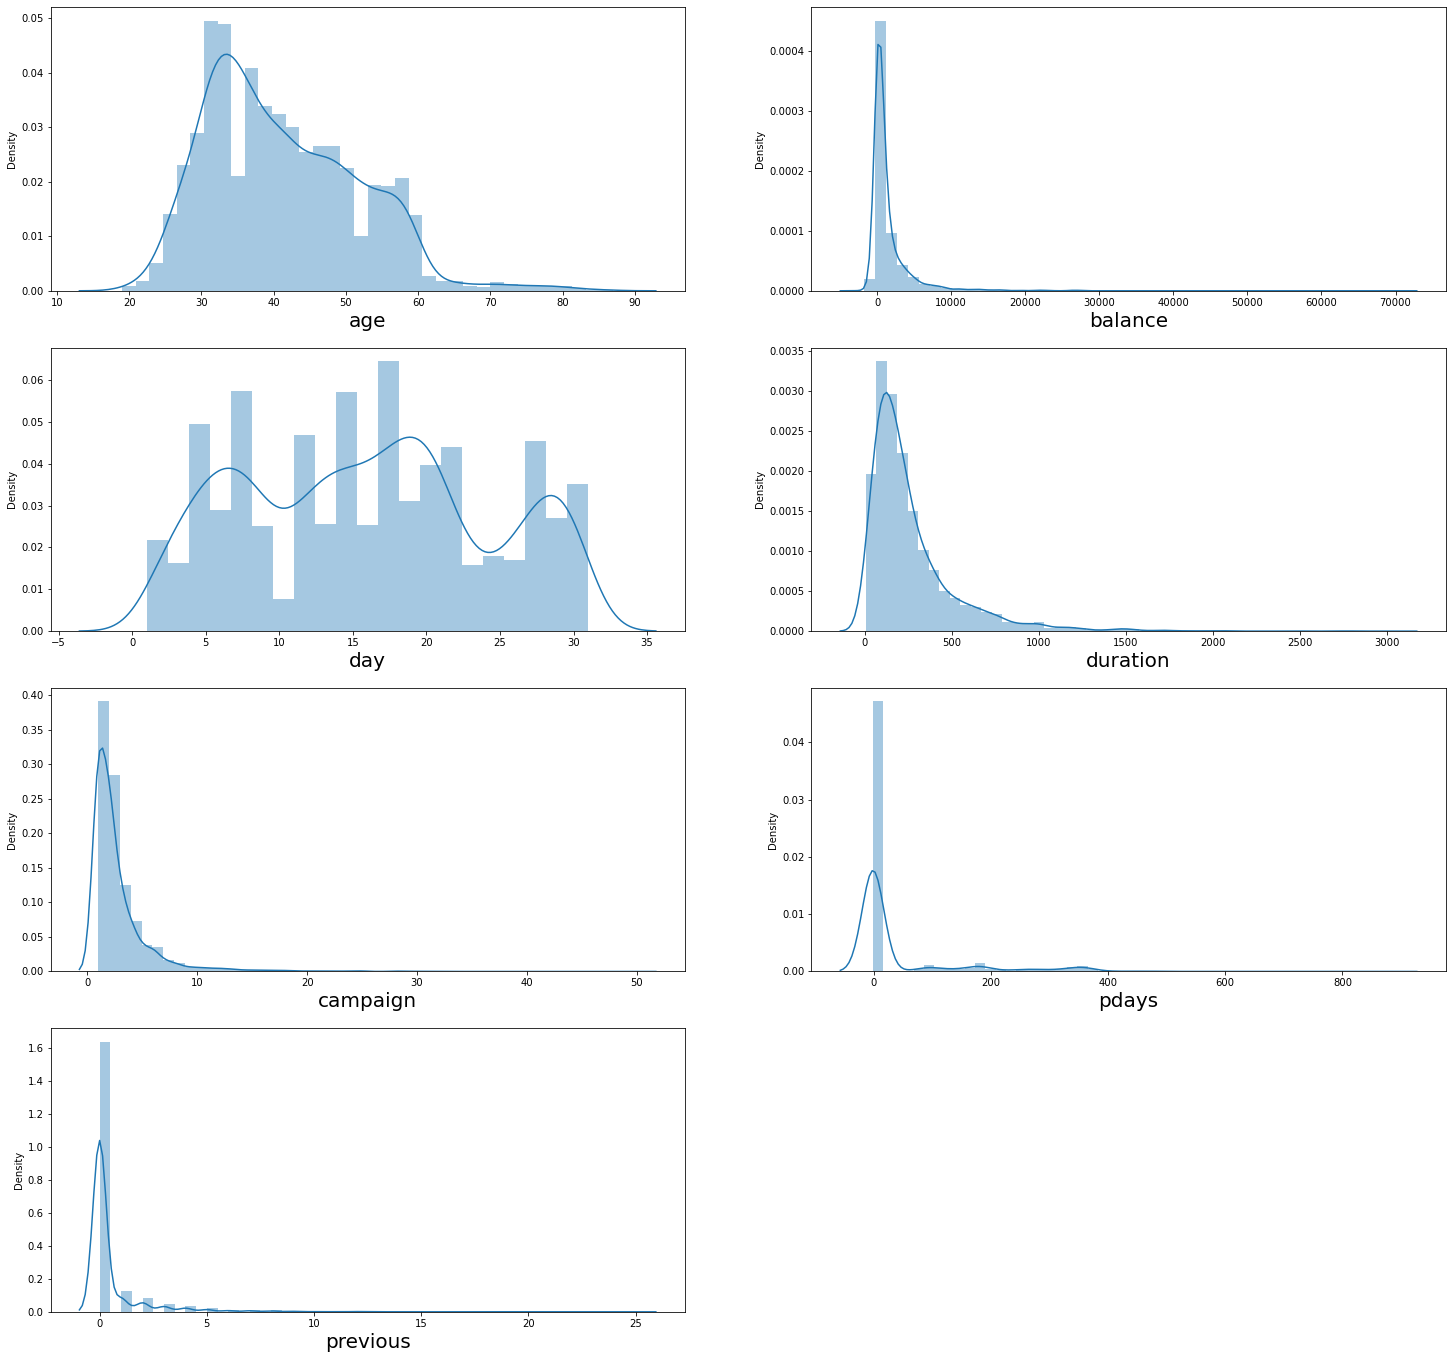

In [17]:
plt.figure(figsize=(25,24),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df_con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

- Age feature is somewhat skewed
- Column balance is having skewness.

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

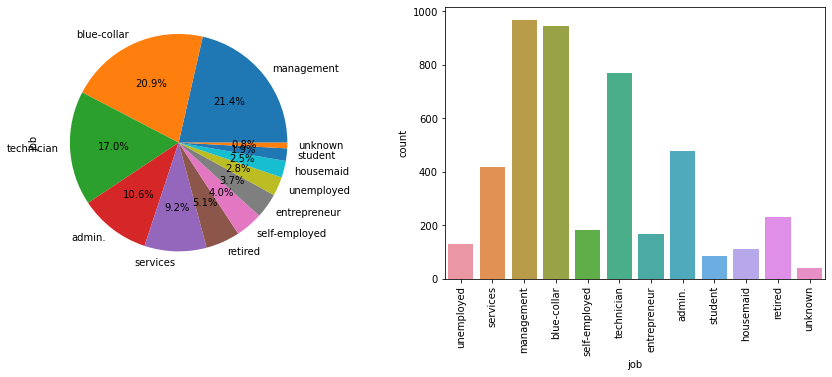

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['job'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['job'])
plt.xticks(rotation=90)
df['job'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

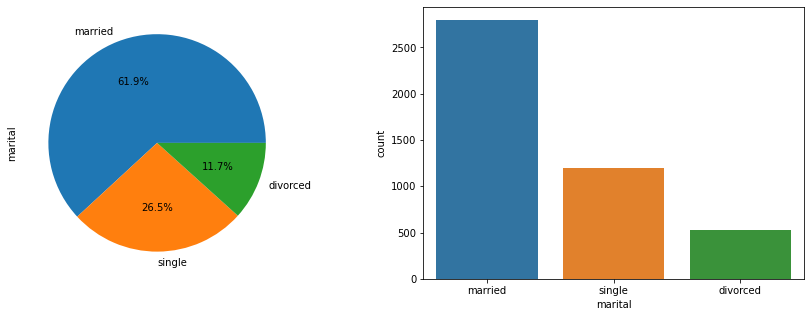

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['marital'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['marital'])
df['marital'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

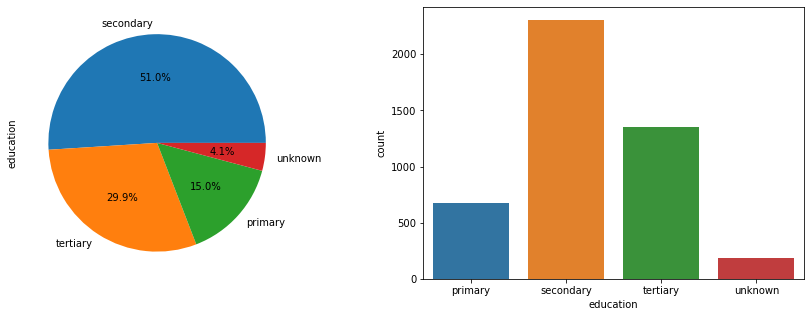

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['education'])
df['education'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

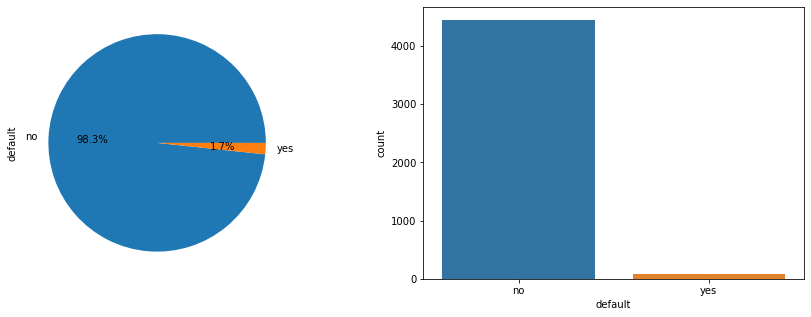

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['default'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['default'])
df['default'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

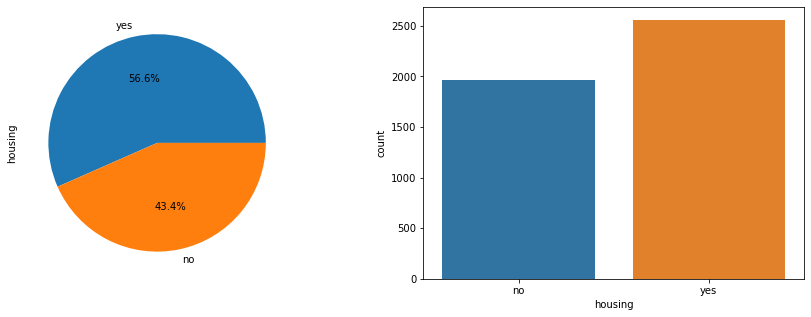

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['housing'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['housing'])
df['housing'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

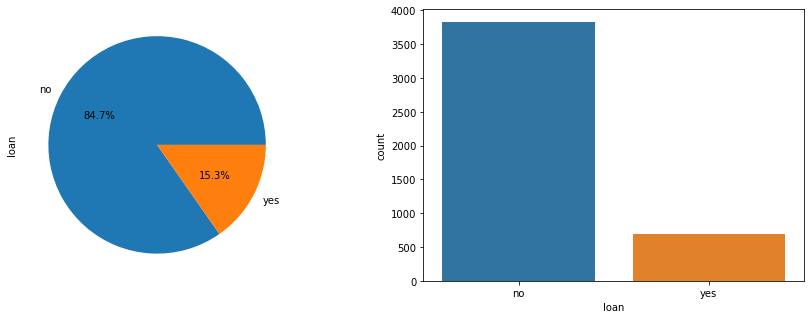

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['loan'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['loan'])
df['loan'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

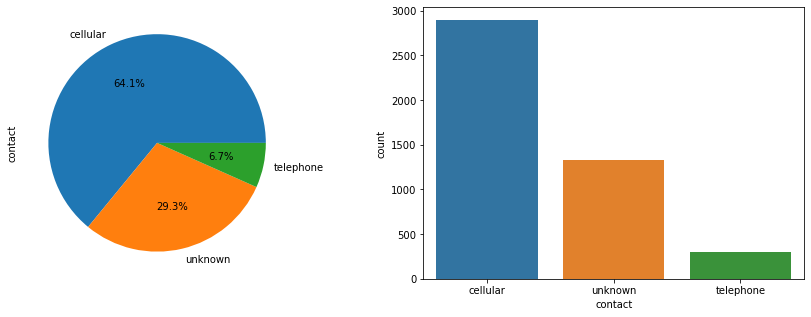

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['contact'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['contact'])
df['contact'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

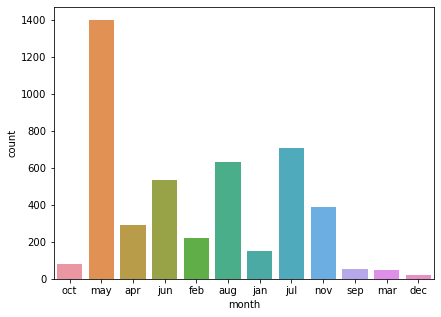

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['month'])
df['month'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

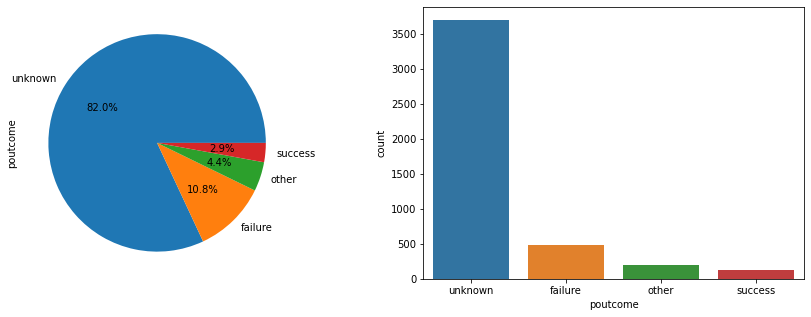

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['poutcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['poutcome'])
df['poutcome'].value_counts()

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

no     4000
yes     521
Name: y, dtype: int64

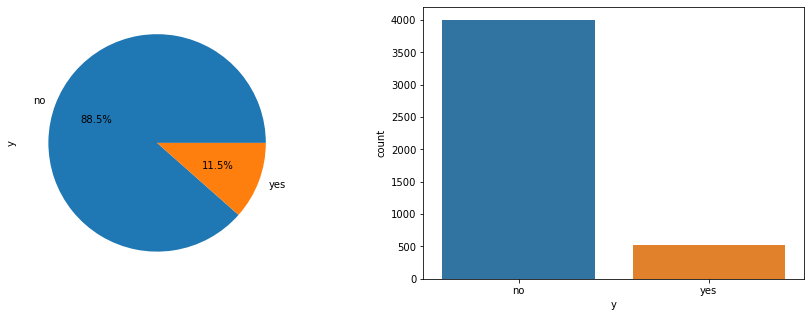

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['y'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['y'])
df['y'].value_counts()

- Target variable is imbalanced.

### Outlier Detection:
Now let's analyze the outliers in continuous data:

In [38]:
df.skew()

age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

In [39]:
#before analysis we will take all the continuous and numerical data into list.
df_con_features=df[['age','balance','day','duration','campaign','pdays','previous']]

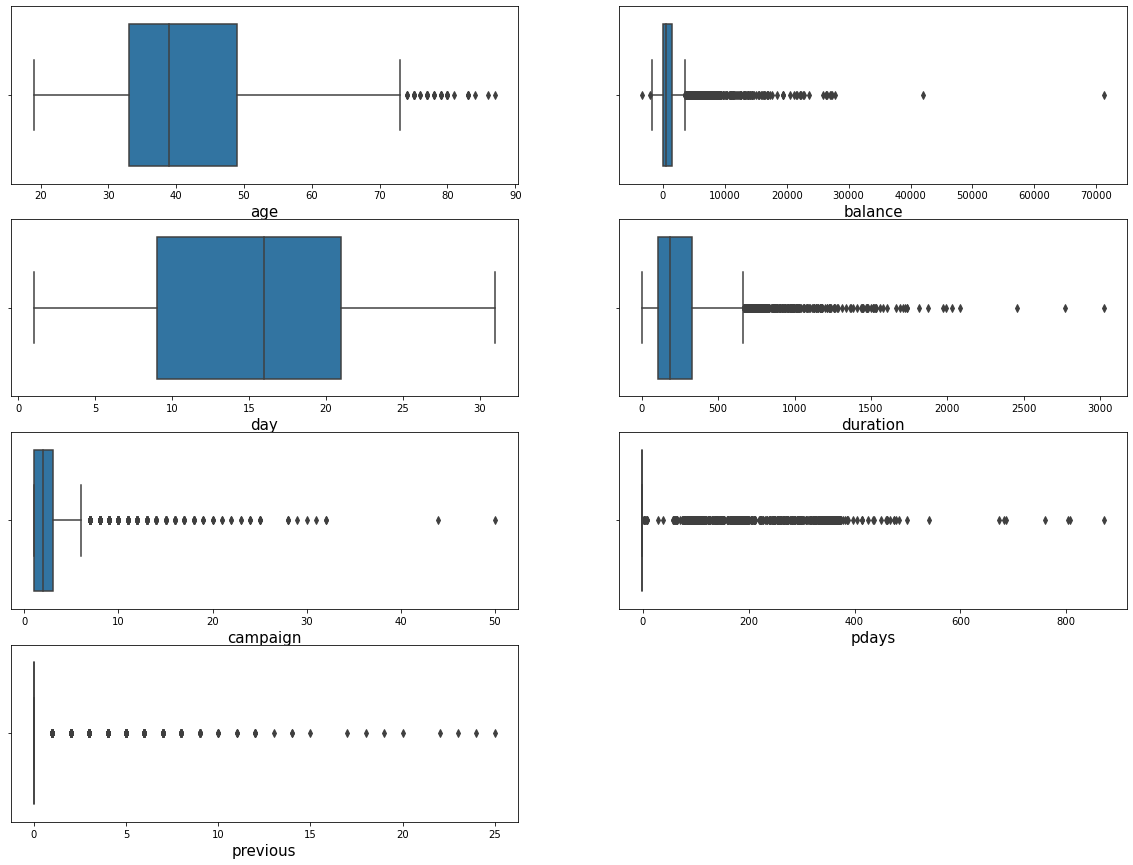

In [40]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_con_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()  


before bivariate analysis, we'll encode the label column.

In [42]:
l = LabelEncoder()
l_s = ['y']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [43]:
df.head()  # 1 = yes, 0 = no

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


#### Bivariate Analysis:

In [44]:
#let's divide the target variable primary_fuel and features
y = df['y']
x = df.drop(columns=['y'])

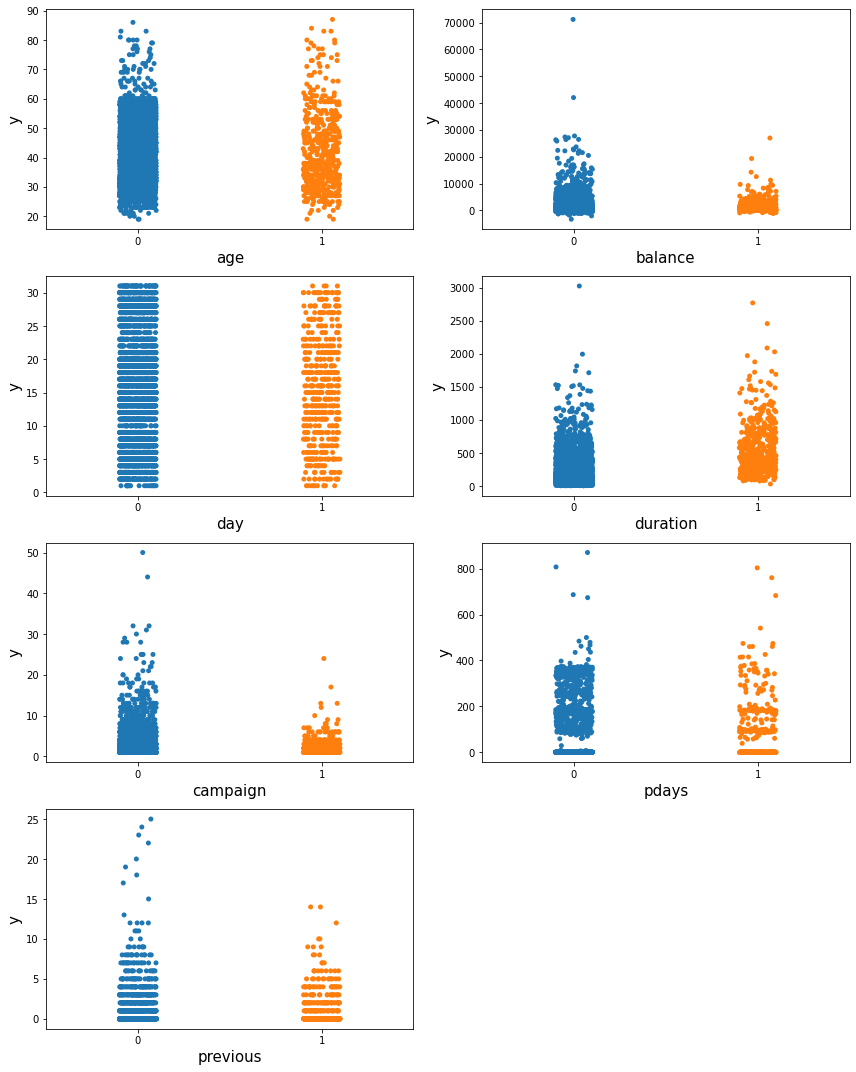

In [45]:
plt.figure(figsize=(12,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.stripplot(y,df_con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('y',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

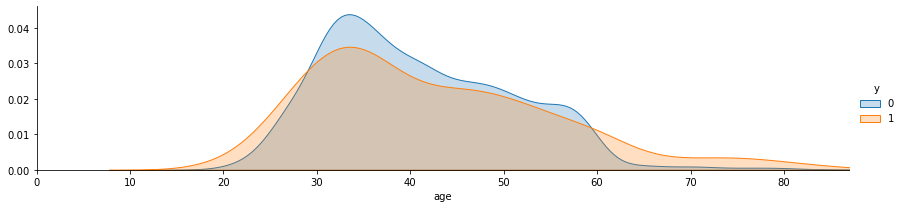

(10.0, 50.0)

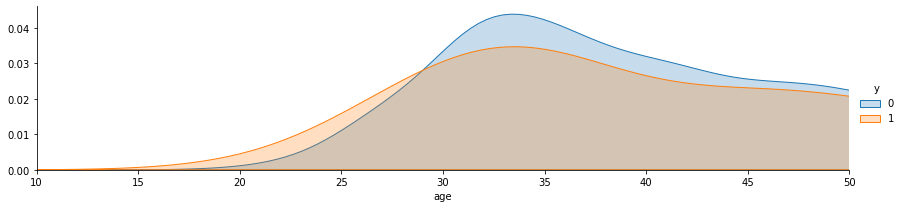

In [52]:
facet = sns.FacetGrid(df, hue="y",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(df, hue="y",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend() 
plt.xlim(10,50)

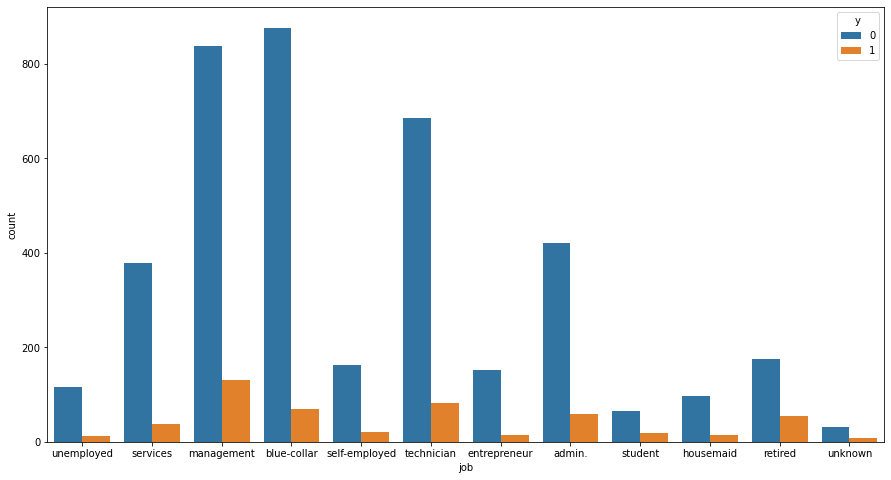

In [49]:
fig = plt.figure(figsize=(15,8))
sns.countplot(data=df, hue='y',x= 'job')
plt.show()

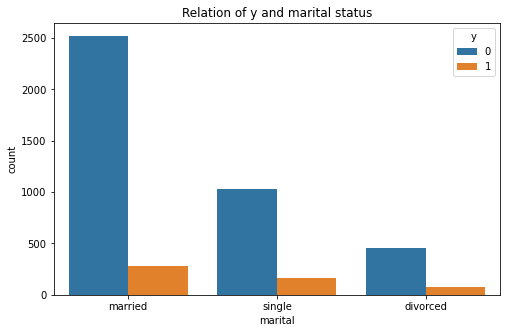

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='marital',hue='y',data=df).set_title('Relation of y and marital status')
plt.show()

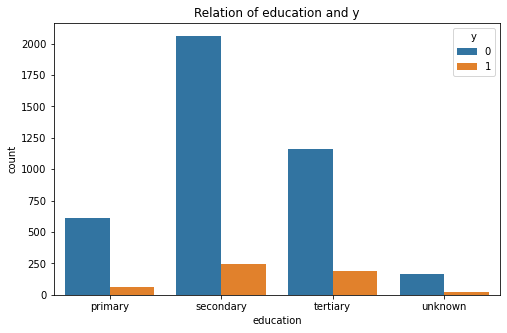

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='education',hue='y',data=df).set_title('Relation of education and y')
plt.show()

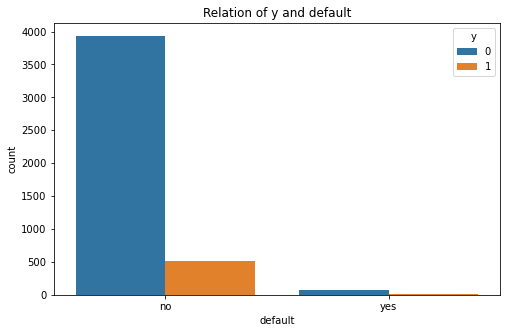

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x='default',hue='y',data=df).set_title('Relation of y and default')
plt.show()

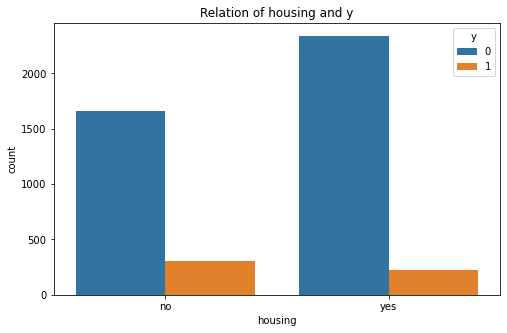

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(x='housing',hue='y',data=df).set_title('Relation of housing and y')
plt.show()

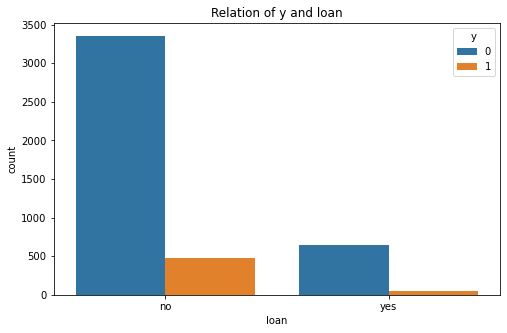

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(x='loan',hue='y',data=df).set_title('Relation of y and loan')
plt.show()

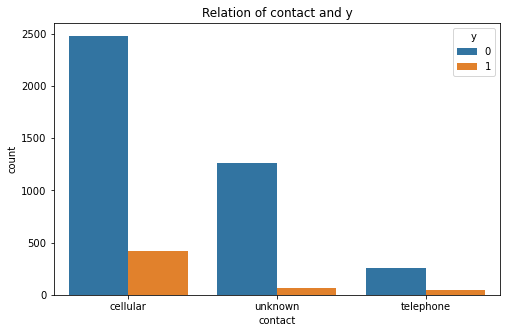

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(x='contact',hue='y',data=df).set_title('Relation of contact and y')
plt.show()

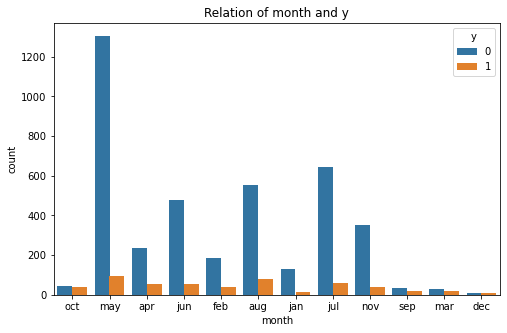

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(x='month',hue='y',data=df).set_title('Relation of month and y')
plt.show()

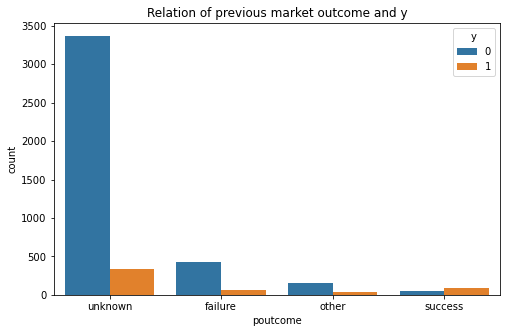

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(x='poutcome',hue='y',data=df).set_title('Relation of previous market outcome and y')
plt.show()

In [11]:
# Drop Alert
drop_columns=['duration']
df=df.drop(columns=drop_columns,axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no


In [12]:
corr = df.corr()
corr

,age,balance,day,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,0.160706,-0.094352,-0.059114
campaign,-0.005148,-0.009976,0.160706,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,-0.067833,0.577562,1.000000


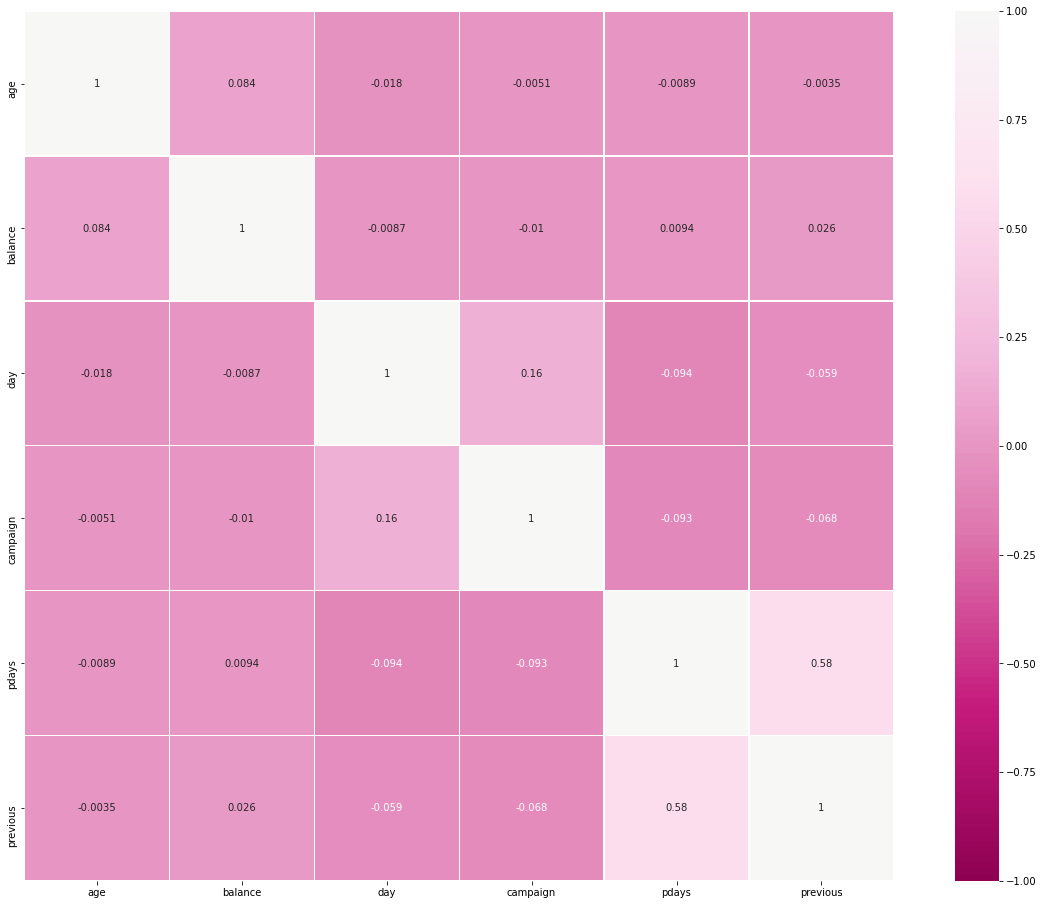

In [13]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='PiYG',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- Pdays and previous are little correlated. We need to check VIF as well.

#### Data pre-processing and cleaning:

1. skewness removal:

In [14]:
df.skew()

age         0.699501
balance     6.596431
day         0.094627
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

In [18]:
# skewed features are taken into a list
features=['balance','campaign','pdays','previous']

In [19]:
scaler=PowerTransformer(method='yeo-johnson')  # using yeo-johnson method

In [20]:
df[features]=scaler.fit_transform(df[features].values)  # scaling the features

In [21]:
df[features]

,balance,campaign,pdays,previous
0,0.282211,-1.114491,-0.469086,-0.469131
1,1.209846,-1.114491,2.154063,2.184828
2,0.130429,-1.114491,2.153496,2.044698
3,0.174936,1.077851,-0.469086,-0.469131
4,-0.445382,-1.114491,-0.469086,-0.469131
...,...,...,...,...
4516,-1.340442,1.310011,-0.469086,-0.469131
4517,-13.487834,-1.114491,-0.469086,-0.469131
4518,-0.283836,1.872655,-0.469086,-0.469131
4519,0.053555,1.077851,2.142574,2.180127


2. Encoding:

Let's encode the nominal data. For that we are using Ordinal Encoder.

In [22]:
en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,10.0,1.0,0.0,0.0,0.282211,0.0,0.0,0.0,19,10.0,-1.114491,-0.469086,-0.469131,3.0,0.0
1,33,7.0,1.0,1.0,0.0,1.209846,1.0,1.0,0.0,11,8.0,-1.114491,2.154063,2.184828,0.0,0.0
2,35,4.0,2.0,2.0,0.0,0.130429,1.0,0.0,0.0,16,0.0,-1.114491,2.153496,2.044698,0.0,0.0
3,30,4.0,1.0,2.0,0.0,0.174936,1.0,1.0,2.0,3,6.0,1.077851,-0.469086,-0.469131,3.0,0.0
4,59,1.0,1.0,1.0,0.0,-0.445382,1.0,0.0,2.0,5,8.0,-1.114491,-0.469086,-0.469131,3.0,0.0


In [23]:
y=df['y']
x=df.drop(columns=['y'])
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4516    0.0
4517    0.0
4518    0.0
4519    0.0
4520    0.0
Name: y, Length: 4521, dtype: float64

In [24]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [25]:
y.value_counts()

1.0    4000
0.0    4000
Name: y, dtype: int64

- The target variable is balanced. Now it's time to Standardize the features as they are in different scales.

#### Standardization:

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
# Checking multicolinearity of the features using VIF
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.392197,age
1,1.054871,job
2,1.286395,marital
3,1.073762,education
4,1.029835,default
5,1.065854,balance
6,1.220801,housing
7,1.034051,loan
8,1.303089,contact
9,1.028610,day


- we are gonna drop pdays as it's correlated with previous.

In [28]:
# Drop Alert
drop_columns=['pdays']
df=df.drop(columns=drop_columns,axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
0,30,10.0,1.0,0.0,0.0,0.282211,0.0,0.0,0.0,19,10.0,-1.114491,-0.469131,3.0,0.0
1,33,7.0,1.0,1.0,0.0,1.209846,1.0,1.0,0.0,11,8.0,-1.114491,2.184828,0.0,0.0
2,35,4.0,2.0,2.0,0.0,0.130429,1.0,0.0,0.0,16,0.0,-1.114491,2.044698,0.0,0.0
3,30,4.0,1.0,2.0,0.0,0.174936,1.0,1.0,2.0,3,6.0,1.077851,-0.469131,3.0,0.0
4,59,1.0,1.0,1.0,0.0,-0.445382,1.0,0.0,2.0,5,8.0,-1.114491,-0.469131,3.0,0.0


#### Hold Out Method:

Model will be built on Hold Out method (75/25 training and test split) to gauge how well the Regressor is working.

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)